# Prediction over Iris Dataset with AdaBoostClassifier :

In this project we are going perform a simple prediction using very popular ensembling model AdaboostClassifier.

In [1]:
 data_path = 'D:/temp/iris.csv'

In [2]:
# Important Libraries 

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
iris_data = pd.read_csv(data_path)

# Visualize the head of the dataframe

iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print('shape of the data :',iris_data.shape)

shape of the data : (150, 6)


In [5]:
# Overview of the data 

iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


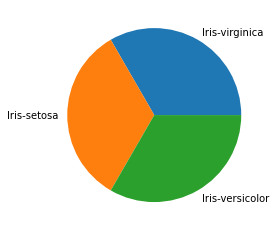

In [6]:
# Visualizing the target density 

counts = iris_data['Species'].value_counts()

plt.pie(counts.values,labels=counts.index)
plt.show()

In [7]:
# Performimg Min-Max scaling :

def minmaxscaling(data):
    
    for feature in data.columns:
        if data[feature].dtype != 'object':
            min_value = min(data[feature])
            max_value = max(data[feature])
            data[feature] = (data[feature]-min_value) / (max_value-min_value)
    
    return data

In [8]:
scaled_df = minmaxscaling(iris_data)

scaled_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.000000,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.006711,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.013423,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.020134,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.026846,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [9]:
# Creating train and test data :

# In this part we are going to split the train and test data as such 
# that both the train and test have equality in target feature.
train = pd.DataFrame(columns=scaled_df.columns)
test = pd.DataFrame(columns=scaled_df.columns)

for sp_type in scaled_df['Species'].unique():
    
    temp_df = scaled_df[scaled_df['Species'] == sp_type ]
    
    temp_df = temp_df.sample(frac = 1)  # shuffling the data
    
    length = len(temp_df)//5  # test_size defined
    
    train = pd.concat([train,temp_df[length:]] , axis = 0)
    
    test = pd.concat([test,temp_df[:length]] , axis = 0)
    
print(train.shape,test.shape)

(120, 6) (30, 6)


In [11]:
# splitting featureset and target value

X_train = train.drop('Species',1)
y_train=train['Species']

X_test = test.drop('Species',1)
y_test = test['Species']

In [12]:
y_train.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
# Numerating the targets :
#-------------------------
# sentosa : 0

# versicolor : 1

# virginica : 2

labels = ['setosa', 'versicolor', 'virginica']

for i in range(3):
    y_train.replace(labels[i] , i , inplace = True)
    y_test.replace(labels[i] , i , inplace = True )

In [14]:
print('X_train --------> ',X_train.shape)

print('y_train --------> ',y_train.shape)

print('X_train --------> ',X_test.shape)

print('X_train --------> ',y_test.shape)

X_train -------->  (120, 5)
y_train -------->  (120,)
X_train -------->  (30, 5)
X_train -------->  (30,)


In [15]:
# Importing training model

from sklearn.ensemble import AdaBoostClassifier as abc

In [17]:
model = abc()

print(model)

AdaBoostClassifier()


In [18]:
# Model training on train data

model.fit(X_train,y_train)

AdaBoostClassifier()

In [19]:
print('Train Data Accuracy :',model.score(X_train,y_train)*100,'%')

Train Data Accuracy : 100.0 %


In [20]:
print('Test Data Accuracy :',model.score(X_test,y_test)*100,'%')

Test Data Accuracy : 100.0 %


In [21]:
# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [22]:
def plot_conf_matrix( featureset , target , model ):
    prediction = model.predict( featureset ).tolist()  
    mat = confusion_matrix( target , prediction )
    plot_confusion_matrix( mat , figsize=(5,5) , colorbar = True)

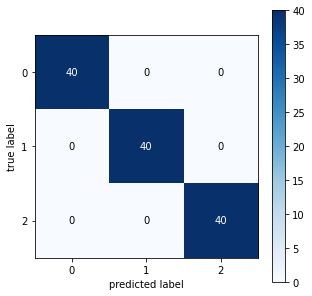

In [23]:
plot_conf_matrix(X_train,y_train,model)

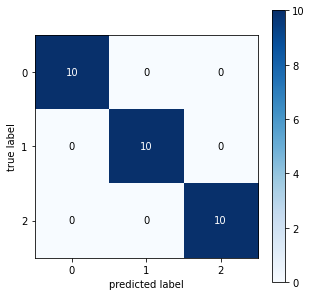

In [24]:
plot_conf_matrix(X_test,y_test,model)

## HURRAH !!!

We've completed the project. 